<a href="https://colab.research.google.com/github/naveen2005114/projects/blob/main/Controller_for_Autonomous_vehicles_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
angle = ctrl.Antecedent(np.arange(-90, 91, 1), 'angle')

In [ ]:
speed = ctrl.Consequent(np.arange(0, 101, 1), 'speed')
steering = ctrl.Consequent(np.arange(-45, 46, 1), 'steering')

In [ ]:
distance['near'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [50, 100, 100])

In [ ]:
angle['left'] = fuzz.trimf(angle.universe, [-90, -90, 0])
angle['center'] = fuzz.trimf(angle.universe, [-15, 0, 15])
angle['right'] = fuzz.trimf(angle.universe, [0, 90, 90])

In [ ]:
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [30, 50, 70])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

In [ ]:
steering['sharp_left'] = fuzz.trimf(steering.universe, [-45, -45, -15])
steering['slight_left'] = fuzz.trimf(steering.universe, [-30, -15, 0])
steering['straight'] = fuzz.trimf(steering.universe, [-5, 0, 5])
steering['slight_right'] = fuzz.trimf(steering.universe, [0, 15, 30])
steering['sharp_right'] = fuzz.trimf(steering.universe, [15, 45, 45])

In [ ]:
rule1 = ctrl.Rule(distance['near'] & angle['center'], (speed['slow'], steering['straight']))
rule2 = ctrl.Rule(distance['near'] & angle['left'], (speed['slow'], steering['sharp_right']))
rule3 = ctrl.Rule(distance['near'] & angle['right'], (speed['slow'], steering['sharp_left']))
rule4 = ctrl.Rule(distance['medium'] & angle['center'], (speed['medium'], steering['straight']))
rule5 = ctrl.Rule(distance['far'] & angle['center'], (speed['fast'], steering['straight']))
rule6 = ctrl.Rule(distance['medium'] & angle['left'], (speed['medium'], steering['slight_right']))
rule7 = ctrl.Rule(distance['medium'] & angle['right'], (speed['medium'], steering['slight_left']))

In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
autonomous_controller = ctrl.ControlSystemSimulation(control_system)


In [ ]:
autonomous_controller.input['distance'] = 40
autonomous_controller.input['angle'] = -30

In [ ]:
autonomous_controller.compute()

In [ ]:
print(f"Speed: {autonomous_controller.output['speed']:.2f}%")
print(f"Steering: {autonomous_controller.output['steering']:.2f}°")

Speed: 37.58%
Steering: 21.16°


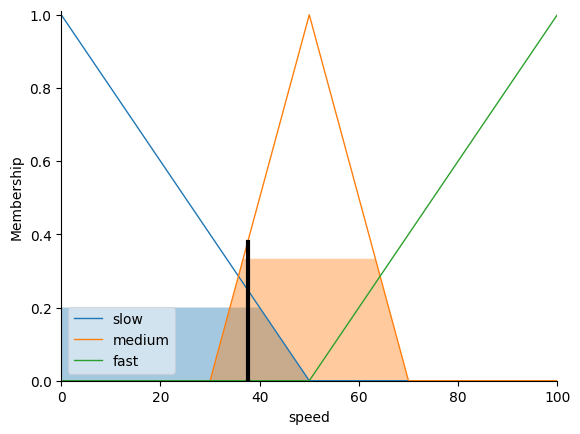

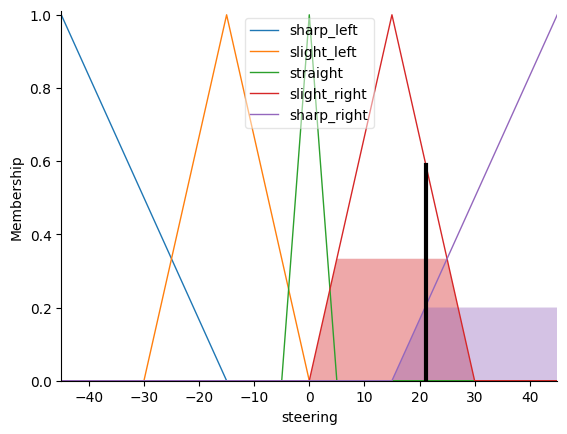

In [ ]:
speed.view(sim=autonomous_controller)
steering.view(sim=autonomous_controller)
plt.show()